### Installing Packages

In [1]:
!pip install torchdata
!pip install -U torchtext==0.13.0
!pip install datasets
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached torch-1.12.1-cp38-cp38-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.12.1 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached torch-1.12.0-cp38-cp38-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.1

### Importing Packages

In [198]:
import torch
import torchtext
import datasets

import matplotlib.pyplot as plt
%matplotlib inline

### Using NLTK Library

I used the nltk package in order to remove stop words (i.e. any, then, etc) from the movie reviews.

In [199]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [200]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'not', 'they', 'wouldn', 'once', "needn't", 'had', "shouldn't", "should've", 'won', 'as', "didn't", 'ma', 'those', 'me', 'm', 'be', 'can', 'off', 'couldn', 'theirs', 'no', 'while', 'will', "that'll", 'above', 'how', 'to', 'when', 'with', 'who', "aren't", 'was', 'weren', 'mightn', 'each', 'such', 'than', 'you', 'been', 'ours', 'll', "wouldn't", 'being', "isn't", 'am', 'has', 'herself', 'these', 'this', "won't", 'doesn', 'she', 'the', 'if', 'my', "it's", 'other', 'ourselves', 'until', "you'll", "you're", "you've", 'and', 'a', 're', "shan't", 'themselves', 'but', 'where', 'myself', 's', "haven't", 'now', 'into', 'which', 'needn', 'on', 'own', 'it', 'over', 'wasn', 'an', 'against', 'yourselves', 'haven', "don't", "couldn't", 'below', 't', 'does', 'yourself', 'whom', 'so', 'nor', 'all', 'hers', 'just', "mustn't", 'here', 'have', 'himself', 'is', 'few', 'shan', 'your', 'what', "wasn't", 'isn', 'i', 'don', "mightn't", 'did', 'in', 'y', "weren't", 'again', 'then', 'do', 'most', "hadn't", "she

### Hugging Face Dataset

I used the imdb dataset from the Hugging Face package. This dataset has 25,000 training examples and 25,000 test examples. I also shuffled the dataset because the original dataset has all negative movie reviews listed first and all positive movie reviews listed last, so I wanted to randomize the data for training.

In [201]:
# get dataset from hugging face library
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Reusing dataset imdb (/home/ec2-user/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/2 [00:00<?, ?it/s]

In [202]:
# reshuffle training and test datasets (randomize)
train_data = train_data.shuffle()
test_data = test_data.shuffle()

In [203]:
train_data[:10]

{'text': ["A cowboy sympathetic to the plight of a nearby Indian tribe is wrongly accused in the rape and murder of the chief's daughter, leading to much hate and violence.<br /><br />This crackpot nudie feature is fun to look at, though thoroughly impossible to defend on any artistic level. The terrible costumes and the fact that all the Indians are obviously white, makes this look more like a live action cartoon than the serious production that it's press materials pretends it to be.<br /><br />In short, the plentiful nudity (the real reason for watching this) is good. Everything else is not. There's definitely better examples of both genres.<br /><br />More interesting is that The Ramrodder was filmed at the infamous Spahn Movie Ranch and features not one, but two members of the Manson family, Catherine Share and Bobby Beausoleil, who was probably already in the can for murder at the time this hit the soda-stained screens of the Pussycat Theater!",
  "I read the book and saw the mov

### Pre-Processing Data

I first removed stop words from the reviews and then tokenized this data. I then used this tokenized data to create a vocab (with tokens that have min_freq=50). I then created the BOW vectors for each example based on this vocab. 

In [204]:
from torchtext.data.utils import get_tokenizer

# use a standard english tokenizer
tokenizer = get_tokenizer('basic_english')

In [205]:
# function that tokenizes the data and removes stopwords
def tokenize_data(ex):
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer(ex['text'])
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    return {'tokens': tokens_without_stopwords}

In [206]:
train_data = train_data.map(tokenize_data)
test_data = test_data.map(tokenize_data)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [207]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [208]:
#Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.train_test_split
# split the training data into training and validation data
train_valid_data = train_data.train_test_split() # default test_size is 0.25
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [209]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 18750
 }),
 Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 6250
 }),
 Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [210]:
from torchtext.vocab import Vocab, build_vocab_from_iterator

UNK_IDX, PAD_IDX = 0, 1
special_symbols = ['<unk>', '<pad>']

# build vocab from the text tokens from training data
vocab = build_vocab_from_iterator(train_data['tokens'], min_freq = 50, specials = special_symbols)
#vocab = build_vocab_from_iterator(train_data['tokens'], max_tokens = 32, specials = special_symbols)

# set unknown index as the default
vocab.set_default_index(UNK_IDX)

In [211]:
# save the vocab object
torch.save(vocab, 'BOW_vocab.pth')

In [212]:
len(vocab)

5705

In [184]:
vocab.get_itos()[:30]

['<unk>',
 '<pad>',
 '.',
 ',',
 "'",
 'movie',
 'film',
 ')',
 '(',
 'one',
 '!',
 'like',
 '?',
 'good',
 'even',
 'would',
 'time',
 'story',
 'really',
 'see',
 'well',
 '-',
 'much',
 'get',
 'people',
 'bad',
 'also',
 'great',
 'first',
 'made']

In [213]:
def transform_tokens_bow(ex):
  bow = torch.zeros(len(vocab))
  c = 0 
  for token in ex['tokens']:
    bow[vocab[token]] += 1
    c += 1
  bow = {'bow': bow/c}
  return bow

In [214]:
train_data = train_data.map(transform_tokens_bow)
valid_data = valid_data.map(transform_tokens_bow)
test_data = test_data.map(transform_tokens_bow)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [215]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 18750
 }),
 Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 6250
 }),
 Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 25000
 }))

### Collate into Batches

This will be the collate function to group the data into batches for the dataloader. 

In [217]:
# collate function to put examples in batches 
def collate_batch(batch):
    batch_bows, batch_labels = [], []

    for b in batch: 
        batch_bows.append(torch.tensor(b['bow'])) # all bow vectors should be the same length (len of vocab)
        batch_labels.append(torch.tensor(b['label']))

    batch_bows = torch.stack(batch_bows)
    batch_labels = torch.stack(batch_labels)

    batch = {'bows': batch_bows,
           'labels': batch_labels}

    return batch

### Training an Epoch

This is the basic training model where the BOW vector is passed into the model and the gradients and weights are changed each iteration. Training is done with the Adam optimization algorithm, which is an extension to SGD.

In [218]:
def get_accuracy(predictions, actual_labels):
    batch_size = predictions.shape[0]
    predicted_labels = predictions.argmax(1)
    num_correct = (predicted_labels == actual_labels).sum()
    accuracy = num_correct / batch_size
    return accuracy

In [219]:
def train(dataloader):
    model.train()

    epoch_loss, epoch_accuracy = 0, 0

    for idx, batch in enumerate(dataloader):
        token_bows = batch['bows']
        labels = batch['labels']
        model.zero_grad()
        predictions = model(token_bows)
        loss = criterion(predictions, labels)
        accuracy = get_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [220]:
def evaluate(dataloader):
    model.eval()

    epoch_loss, epoch_accuracy = 0, 0

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            token_bows = batch['bows']
            labels = batch['labels']
            predictions = model(token_bows)
            loss = criterion(predictions, labels)
            accuracy = get_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [221]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### BOW Classifier Class

This is the base model with just a simple BOW model. The final and only layer is just a linear layer that provides the predictions/scores of positive or negative labels.


In [216]:
# SIMPLE BOW CLASSIFIER

from torch import nn
import torch.nn.functional as F

class BoWClassifier(nn.Module):
# I referred to this tutorial for help: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
    def forward(self, bow_vec):
        # pass through linear layer
        return self.linear(bow_vec)

### Fine Tuning BOW Parameters

I tinkered with the parameters and put a comment at the top of the cell of the parameters I was testing out. The final BOW model with the final parameters chosen is shown at the very bottom of this notebook. 

Epoch: 01 | Time: 0m 19s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 02 | Time: 0m 19s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 03 | Time: 0m 18s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 04 | Time: 0m 17s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 05 | Time: 0m 17s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 06 | Time: 0m 17s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 07 | Time: 0m 18s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.507
test loss: 0.693, test_acc: 0.500
Epoch: 08 | Time: 0m 18s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.693, val

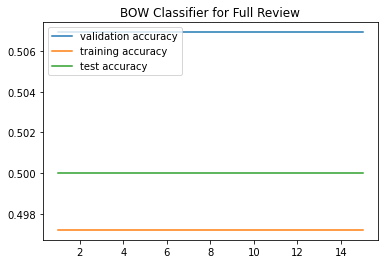

In [39]:
# BOW (with vocab min freq = 1000 and batch size = 500 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 2m 10s
train_loss: 0.588, train_acc: 0.756
valid_loss: 0.504, valid_acc: 0.836
test loss: 0.509, test_acc: 0.836
Epoch: 02 | Time: 2m 3s
train_loss: 0.445, train_acc: 0.865
valid_loss: 0.422, valid_acc: 0.864
test loss: 0.430, test_acc: 0.856
Epoch: 03 | Time: 2m 3s
train_loss: 0.378, train_acc: 0.883
valid_loss: 0.379, valid_acc: 0.872
test loss: 0.390, test_acc: 0.864
Epoch: 04 | Time: 2m 3s
train_loss: 0.338, train_acc: 0.895
valid_loss: 0.353, valid_acc: 0.877
test loss: 0.365, test_acc: 0.869
Epoch: 05 | Time: 2m 9s
train_loss: 0.310, train_acc: 0.902
valid_loss: 0.336, valid_acc: 0.880
test loss: 0.348, test_acc: 0.872
Epoch: 06 | Time: 2m 9s
train_loss: 0.290, train_acc: 0.908
valid_loss: 0.323, valid_acc: 0.881
test loss: 0.336, test_acc: 0.874
Epoch: 07 | Time: 2m 11s
train_loss: 0.273, train_acc: 0.912
valid_loss: 0.313, valid_acc: 0.881
test loss: 0.327, test_acc: 0.875
Epoch: 08 | Time: 2m 2s
train_loss: 0.260, train_acc: 0.917
valid_loss: 0.306, valid_acc

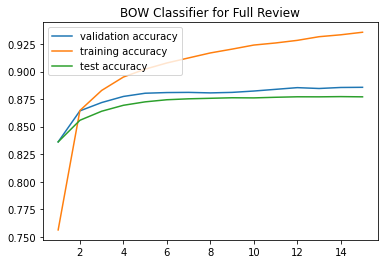

In [61]:
# BOW (with vocab min freq = 50 and batch size = 500 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 9s
train_loss: 0.506, train_acc: 0.802
valid_loss: 0.410, valid_acc: 0.845
test loss: 0.408, test_acc: 0.856
Epoch: 02 | Time: 1m 9s
train_loss: 0.356, train_acc: 0.878
valid_loss: 0.352, valid_acc: 0.863
test loss: 0.349, test_acc: 0.871
Epoch: 03 | Time: 1m 8s
train_loss: 0.307, train_acc: 0.891
valid_loss: 0.327, valid_acc: 0.869
test loss: 0.323, test_acc: 0.875
Epoch: 04 | Time: 1m 12s
train_loss: 0.279, train_acc: 0.900
valid_loss: 0.315, valid_acc: 0.872
test loss: 0.310, test_acc: 0.878
Epoch: 05 | Time: 1m 14s
train_loss: 0.261, train_acc: 0.906
valid_loss: 0.307, valid_acc: 0.873
test loss: 0.302, test_acc: 0.879
Epoch: 06 | Time: 1m 16s
train_loss: 0.248, train_acc: 0.912
valid_loss: 0.303, valid_acc: 0.875
test loss: 0.298, test_acc: 0.879
Epoch: 07 | Time: 1m 13s
train_loss: 0.237, train_acc: 0.915
valid_loss: 0.301, valid_acc: 0.876
test loss: 0.296, test_acc: 0.879
Epoch: 08 | Time: 1m 10s
train_loss: 0.229, train_acc: 0.919
valid_loss: 0.300, valid_

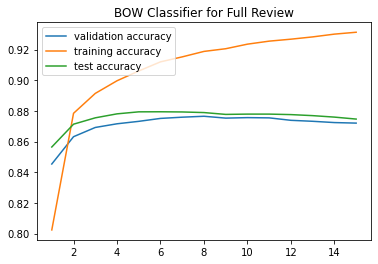

In [90]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 56s
train_loss: 0.496, train_acc: 0.820
valid_loss: 0.398, valid_acc: 0.864
test loss: 0.400, test_acc: 0.866
Epoch: 02 | Time: 2m 2s
train_loss: 0.339, train_acc: 0.888
valid_loss: 0.338, valid_acc: 0.877
test loss: 0.342, test_acc: 0.876
Epoch: 03 | Time: 1m 58s
train_loss: 0.287, train_acc: 0.904
valid_loss: 0.312, valid_acc: 0.882
test loss: 0.318, test_acc: 0.881
Epoch: 04 | Time: 1m 58s
train_loss: 0.257, train_acc: 0.914
valid_loss: 0.298, valid_acc: 0.886
test loss: 0.305, test_acc: 0.882
Epoch: 05 | Time: 1m 59s
train_loss: 0.236, train_acc: 0.921
valid_loss: 0.289, valid_acc: 0.887
test loss: 0.298, test_acc: 0.883
Epoch: 06 | Time: 2m 0s
train_loss: 0.220, train_acc: 0.927
valid_loss: 0.284, valid_acc: 0.889
test loss: 0.294, test_acc: 0.883
Epoch: 07 | Time: 2m 11s
train_loss: 0.208, train_acc: 0.932
valid_loss: 0.281, valid_acc: 0.888
test loss: 0.293, test_acc: 0.882
Epoch: 08 | Time: 2m 9s
train_loss: 0.198, train_acc: 0.937
valid_loss: 0.280, valid_

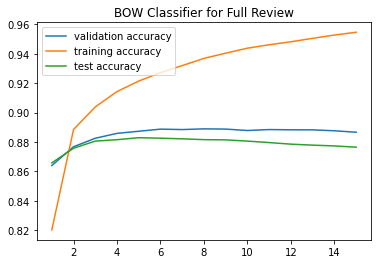

In [117]:
# BOW (with vocab min freq = 50 and batch size = 128 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 20s
train_loss: 0.596, train_acc: 0.742
valid_loss: 0.519, valid_acc: 0.817
test loss: 0.518, test_acc: 0.819
Epoch: 02 | Time: 1m 20s
train_loss: 0.462, train_acc: 0.851
valid_loss: 0.440, valid_acc: 0.849
test loss: 0.439, test_acc: 0.849
Epoch: 03 | Time: 1m 21s
train_loss: 0.397, train_acc: 0.871
valid_loss: 0.399, valid_acc: 0.859
test loss: 0.398, test_acc: 0.859
Epoch: 04 | Time: 1m 15s
train_loss: 0.359, train_acc: 0.881
valid_loss: 0.374, valid_acc: 0.867
test loss: 0.372, test_acc: 0.863
Epoch: 05 | Time: 1m 11s
train_loss: 0.332, train_acc: 0.888
valid_loss: 0.357, valid_acc: 0.871
test loss: 0.355, test_acc: 0.867
Epoch: 06 | Time: 1m 12s
train_loss: 0.313, train_acc: 0.893
valid_loss: 0.344, valid_acc: 0.873
test loss: 0.342, test_acc: 0.869
Epoch: 07 | Time: 1m 12s
train_loss: 0.298, train_acc: 0.897
valid_loss: 0.335, valid_acc: 0.874
test loss: 0.333, test_acc: 0.871
Epoch: 08 | Time: 1m 13s
train_loss: 0.286, train_acc: 0.900
valid_loss: 0.328, val

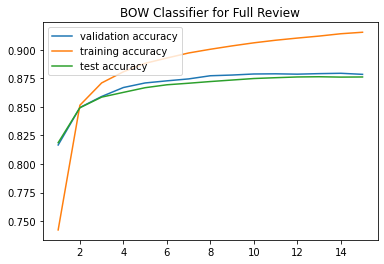

In [145]:
# BOW (with vocab min freq = 100 and batch size = 500 and and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 15s
train_loss: 0.686, train_acc: 0.675
valid_loss: 0.679, valid_acc: 0.750
test loss: 0.680, test_acc: 0.744
Epoch: 02 | Time: 1m 19s
train_loss: 0.673, train_acc: 0.746
valid_loss: 0.666, valid_acc: 0.763
test loss: 0.667, test_acc: 0.763
Epoch: 03 | Time: 1m 28s
train_loss: 0.660, train_acc: 0.769
valid_loss: 0.654, valid_acc: 0.766
test loss: 0.655, test_acc: 0.768
Epoch: 04 | Time: 1m 58s
train_loss: 0.647, train_acc: 0.777
valid_loss: 0.643, valid_acc: 0.774
test loss: 0.644, test_acc: 0.775
Epoch: 05 | Time: 1m 47s
train_loss: 0.636, train_acc: 0.785
valid_loss: 0.632, valid_acc: 0.780
test loss: 0.634, test_acc: 0.781
Epoch: 06 | Time: 1m 39s
train_loss: 0.625, train_acc: 0.791
valid_loss: 0.622, valid_acc: 0.785
test loss: 0.624, test_acc: 0.787
Epoch: 07 | Time: 1m 30s
train_loss: 0.615, train_acc: 0.797
valid_loss: 0.612, valid_acc: 0.791
test loss: 0.614, test_acc: 0.791
Epoch: 08 | Time: 1m 25s
train_loss: 0.605, train_acc: 0.801
valid_loss: 0.603, val

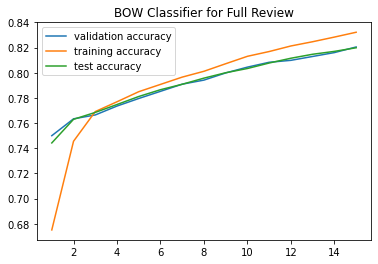

In [171]:
# BOW (with vocab min freq = 100 and batch size = 500 and lr=5e-3)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 13s
train_loss: 0.687, train_acc: 0.683
valid_loss: 0.680, valid_acc: 0.751
test loss: 0.680, test_acc: 0.748
Epoch: 02 | Time: 1m 13s
train_loss: 0.673, train_acc: 0.768
valid_loss: 0.667, valid_acc: 0.767
test loss: 0.667, test_acc: 0.762
Epoch: 03 | Time: 1m 13s
train_loss: 0.660, train_acc: 0.777
valid_loss: 0.655, valid_acc: 0.775
test loss: 0.655, test_acc: 0.771
Epoch: 04 | Time: 1m 12s
train_loss: 0.648, train_acc: 0.783
valid_loss: 0.643, valid_acc: 0.781
test loss: 0.644, test_acc: 0.777
Epoch: 05 | Time: 1m 12s
train_loss: 0.636, train_acc: 0.788
valid_loss: 0.632, valid_acc: 0.787
test loss: 0.634, test_acc: 0.783
Epoch: 06 | Time: 1m 13s
train_loss: 0.625, train_acc: 0.793
valid_loss: 0.622, valid_acc: 0.795
test loss: 0.624, test_acc: 0.789
Epoch: 07 | Time: 1m 12s
train_loss: 0.615, train_acc: 0.798
valid_loss: 0.613, valid_acc: 0.798
test loss: 0.614, test_acc: 0.793
Epoch: 08 | Time: 1m 15s
train_loss: 0.605, train_acc: 0.803
valid_loss: 0.603, val

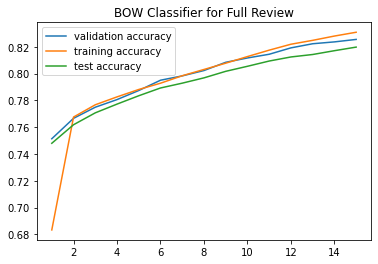

In [194]:
# BOW (with vocab min freq = 100)

from torch.utils.data import DataLoader

BATCH_SIZE = 500

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)

criterion = nn.CrossEntropyLoss()

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 1m 14s
train_loss: 0.687, train_acc: 0.675
valid_loss: 0.679, valid_acc: 0.752
test loss: 0.680, test_acc: 0.749
Epoch: 02 | Time: 1m 14s
train_loss: 0.673, train_acc: 0.767
valid_loss: 0.667, valid_acc: 0.766
test loss: 0.667, test_acc: 0.761
Epoch: 03 | Time: 1m 13s
train_loss: 0.660, train_acc: 0.777
valid_loss: 0.654, valid_acc: 0.774
test loss: 0.655, test_acc: 0.771
Epoch: 04 | Time: 1m 14s
train_loss: 0.648, train_acc: 0.783
valid_loss: 0.643, valid_acc: 0.781
test loss: 0.644, test_acc: 0.777
Epoch: 05 | Time: 1m 13s
train_loss: 0.636, train_acc: 0.788
valid_loss: 0.632, valid_acc: 0.788
test loss: 0.634, test_acc: 0.783
Epoch: 06 | Time: 1m 14s
train_loss: 0.625, train_acc: 0.793
valid_loss: 0.622, valid_acc: 0.795
test loss: 0.624, test_acc: 0.789
Epoch: 07 | Time: 1m 13s
train_loss: 0.615, train_acc: 0.798
valid_loss: 0.613, valid_acc: 0.798
test loss: 0.614, test_acc: 0.793
Epoch: 08 | Time: 1m 14s
train_loss: 0.605, train_acc: 0.803
valid_loss: 0.603, val

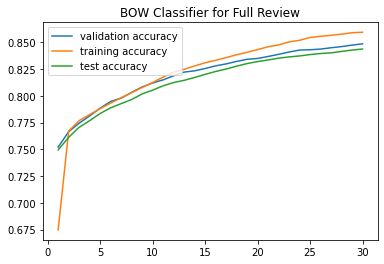

In [197]:
# BOW (with vocab min freq = 100)

from torch.utils.data import DataLoader

BATCH_SIZE = 500

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)

criterion = nn.CrossEntropyLoss()

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

### Final BOW Model

After tinkering with parameters, I settled on the following parameters as the final BOW Model.

Epoch: 01 | Time: 2m 5s
train_loss: 0.686, train_acc: 0.604
valid_loss: 0.679, valid_acc: 0.640
test loss: 0.680, test_acc: 0.639
Epoch: 02 | Time: 2m 3s
train_loss: 0.671, train_acc: 0.760
valid_loss: 0.666, valid_acc: 0.757
test loss: 0.666, test_acc: 0.759
Epoch: 03 | Time: 2m 2s
train_loss: 0.657, train_acc: 0.791
valid_loss: 0.653, valid_acc: 0.771
test loss: 0.654, test_acc: 0.774
Epoch: 04 | Time: 2m 4s
train_loss: 0.644, train_acc: 0.799
valid_loss: 0.641, valid_acc: 0.782
test loss: 0.642, test_acc: 0.782
Epoch: 05 | Time: 2m 3s
train_loss: 0.632, train_acc: 0.806
valid_loss: 0.630, valid_acc: 0.788
test loss: 0.631, test_acc: 0.789
Epoch: 06 | Time: 2m 6s
train_loss: 0.620, train_acc: 0.811
valid_loss: 0.619, valid_acc: 0.796
test loss: 0.621, test_acc: 0.795
Epoch: 07 | Time: 2m 4s
train_loss: 0.609, train_acc: 0.814
valid_loss: 0.609, valid_acc: 0.802
test loss: 0.611, test_acc: 0.801
Epoch: 08 | Time: 2m 3s
train_loss: 0.598, train_acc: 0.819
valid_loss: 0.599, valid_acc: 

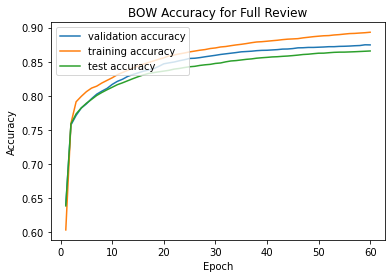

In [222]:
# BOW (with vocab min freq = 100)

from torch.utils.data import DataLoader

BATCH_SIZE = 500

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)

criterion = nn.CrossEntropyLoss()

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

N_EPOCHS = 60
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []
train_losses = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'BOW-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Accuracy for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

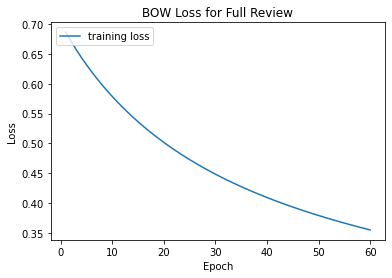

In [223]:
plt.title('BOW Loss for Full Review')
plt.plot(range(1, N_EPOCHS+1), train_losses, label = 'training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")

In [224]:
model.load_state_dict(torch.load('BOW-model.pt'))
test_loss, test_acc = evaluate(test_dataloader)
print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

test_loss: 0.391, test_acc: 0.866


### Predictions

In [238]:
model.load_state_dict(torch.load('BOW-model.pt'))

def predict_label(text):
    labels = ['Negative', 'Positive']

    # put model in eval mode
    model.eval()

    # process input
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer(text)
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    bow = torch.zeros(len(vocab))
    c = 0 
    for token in tokens_without_stopwords:
        bow[vocab[token]] += 1
        c += 1
    bow = bow/c
    # add batch of 1 (dimension)
    bow = bow.unsqueeze(0)
    #print('bow shape')
    #print(bow.shape)

    with torch.no_grad():
        scores = model(bow)

    predicted_label = scores.argmax(1)

    return labels[predicted_label.item()]

In [241]:
text_review = 'This movie was the worst but I can see how it might be seen as positive. Overall, I thought the movie was really good.'
l = predict_label(text_review)
print(l)

Negative
